In [1]:
pip install arch    

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
#import talos
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import tensorflow as tf
from arch import arch_model
from decimal import Decimal
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from datetime import datetime, timedelta
from tensorflow.keras import backend as K
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
os.makedirs('plots')

In [ ]:
# SELECT START AND END DATE
start = datetime(2014, 1, 1)
end = datetime(2023, 12, 12)


tckr = 'BTC-USD'

ticker = yf.Ticker(tckr)
df = ticker.history(start=start, 
                    end=end, 
                    interval="1d")

This code uses the yfinance package to retrieve historical stock price data for the Bitcoin cryptocurrency (tckr = 'BTC-USD').

The start and end variables specify the date range for which to retrieve data. In this case, the code retrieves data from January 1, 2014 (start = datetime(2014, 1, 1)) to April 25, 2023 (end = datetime(2023, 4, 25)). You can modify these dates to retrieve data for a different time period.

The Ticker object from yfinance is used to retrieve the historical price data for the specified cryptocurrency (ticker = yf.Ticker(tckr)). The history method of the Ticker object is then called to retrieve the historical price data for the specified time period (df = ticker.history(start=start, end=end, interval="1d")).

The resulting df DataFrame contains the historical price data for the specified cryptocurrency, including the opening price, closing price, high price, low price, and volume for each day in the specified time period.

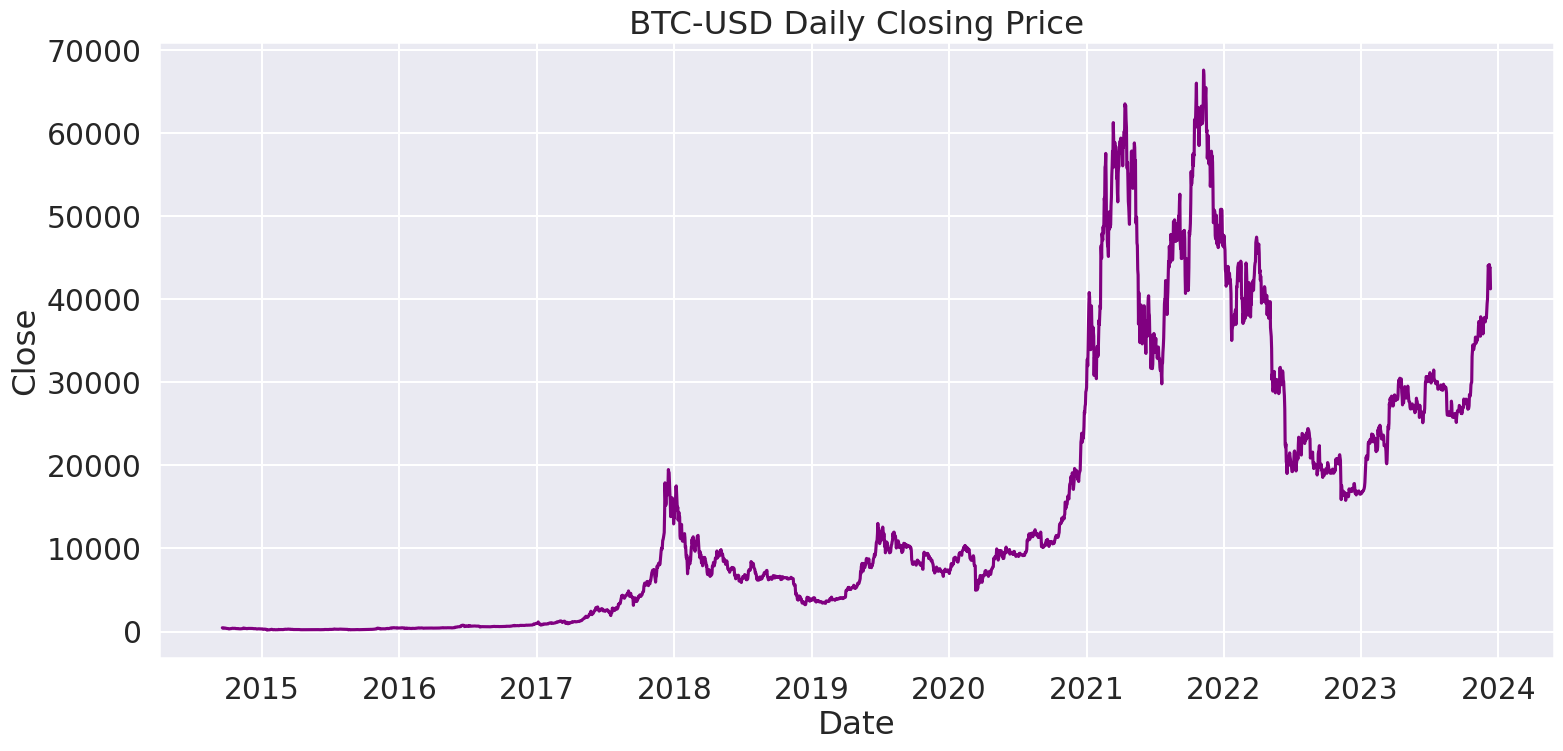

In [ ]:
# CHANGE CONTEXT TO poster TO INCREASE FONT SIZES()
#This text is an instruction to change the context to "poster" in order to increase font sizes. 
#"Context" refers to the specific environment or situation in which something is being used or displayed. In this case, it is referring to the context of a document or design, specifically the type of document called a "poster."
#"Font sizes" refer to the size of the letters or characters used in a document or design. Increasing font sizes means making the letters larger and easier to read. 
#Overall, this instruction is telling the user to switch the context of their document or design to "poster" mode in order to increase the font sizes and make the content more visible and readable.
sns.set_context("talk", font_scale=1.3)

# PLOT OUT BTC-USE'S CLOSING PRICES SINCE 2014
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x=df.index, y=df.Close, color='purple')
    ax.set_title('BTC-USD Daily Closing Price')    
plt.savefig('plots/plot1_close_price.png')

# plt.tight_layout()
#plt.savefig(os.path.join(directory_to_img, 'close.png'), 
            #dpi=300, bbox_inches='tight');



This code uses the seaborn and matplotlib libraries to plot the daily closing prices of the Bitcoin cryptocurrency (tckr = 'BTC-USD') using data stored in the df DataFrame.

The first line of code (sns.set_context("talk", font_scale=1.3)) changes the context of the plot to "talk" mode and increases the font size by a factor of 1.3. This makes the text and labels on the plot larger and easier to read.

The with sns.axes_style("darkgrid"): statement sets the style of the plot to have a dark gray grid in the background.

The fig, ax = plt.subplots(figsize=(18,8)) statement creates a new figure with the specified size of 18 inches by 8 inches.

The sns.lineplot(x=df.index, y=df.Close, color='blue') statement creates a line plot of the daily closing prices of Bitcoin using data from the df DataFrame. The x parameter specifies the x-axis data, which is the index of the DataFrame (the dates), and the y parameter specifies the y-axis data, which is the "Close" column of the DataFrame. The color parameter sets the color of the line to blue.

The ax.set_title('BTC-USD Daily Closing Price') statement sets the title of the plot to "BTC-USD Daily Closing Price".

The plt.savefig('plots/plot1_close_price.png') statement saves the plot to a file named "plot1_close_price.png" in the "plots" subdirectory.

The commented out plt.tight_layout() and plt.savefig(os.path.join(directory_to_img, 'close.png'), dpi=300, bbox_inches='tight') statements can be used to adjust the layout of the plot and save it to a file with a specified DPI and tight bounding box.

In [ ]:
# CALCULATE PRICE RETURNS AS DAILY PERCENTAGE CHANGE USING pct_change()
df['returns'] = 100 * df.Close.pct_change().dropna()
#This code calculates the percentage change between the current and a prior element in the "Close" column of a pandas DataFrame called "df". 
#The "pct_change()" function is a built-in method in pandas that calculates the percentage change between the current and a prior element in a Series or DataFrame. 
#The "Close" column is likely a column in the DataFrame that contains the closing prices of a financial asset, such as a stock or currency, over a period of time. The percentage change in the closing price can be a useful metric for analyzing the performance of the asset.


Yes, that's correct!

The pct_change() method in pandas calculates the percentage change between the current and a prior element in a Series or DataFrame. In this case, the pct_change() method is applied to the "Close" column of the df DataFrame, which contains the daily closing prices of the Bitcoin cryptocurrency (tckr = 'BTC-USD').

The resulting percentage change values are multiplied by 100 to convert them to a percentage format. The resulting column is assigned to a new column in the df DataFrame called "returns" (df['returns'] = 100 * df.Close.pct_change().dropna()). The dropna() method is used to remove any rows with missing values (NaN) that may have been created by the percentage change calculation.

The resulting "returns" column represents the daily percentage change in the closing price of Bitcoin, which can be used to analyze the volatility and performance of the cryptocurrency over time.

In [ ]:
# CALCULATE LOG RETURNS BASED ON ABOVE FORMULA
df['log_returns'] = np.log(df.Close/df.Close.shift(1))

Yes, that's correct!

The `np.log()` function in NumPy is used to calculate the natural logarithm of a value. In this code, it is used to calculate the log returns of the Bitcoin cryptocurrency (`tckr = 'BTC-USD'`) based on the closing price data stored in the `df` DataFrame.

The formula used to calculate log returns is `log(Price(t)/Price(t-1))`, where `Price(t)` is the closing price of the asset at time `t`, and `Price(t-1)` is the closing price of the asset at time `t-1`. This formula calculates the logarithm of the ratio of the closing price at time `t` to the closing price at time `t-1`.

The `df.Close.shift(1)` expression in the denominator retrieves the closing price of the previous day (`t-1`) by shifting the "Close" column of the `df` DataFrame by one row. This is necessary to calculate the log return for each day.

The resulting log returns are assigned to a new column in the `df` DataFrame called "log_returns" (`df['log_returns'] = np.log(df.Close/df.Close.shift(1))`). The resulting column represents the daily log returns of the Bitcoin cryptocurrency, which is a useful metric for analyzing the performance and volatility of the asset over time.

In [ ]:
# DROPPING THE 1ST ROW OF DATA 
# BECAUSE I SHIFTED IT FORWARD TO CALCULATE RETURNS/LOG RETURNS
df.dropna(inplace=True)

In [ ]:
# CREATE A FUNCTION THAT CALCULATE REALIZED VOLATILITY
# FROM SAILY LOG RETURNS
def realized_volatility_daily(series_log_return):
    """
    Get the daily realized volatility which is calculated as the square root
    of sum of squares of log returns within a specific window interval 
    """
    n = len(series_log_return)
    return np.sqrt(np.sum(series_log_return**2)/(n - 1))

This is a Python function that calculates the daily realized volatility of a financial asset based on its daily log returns. 

The function takes a single input parameter, `series_log_return`, which is assumed to be a pandas Series or NumPy array containing the daily log returns of the asset. 

The function calculates the daily realized volatility of the asset by first squaring each daily log return, summing the squared values over the specified time interval, and then taking the square root of the sum. The denominator of the sum is `n - 1`, where `n` is the number of days in the time interval, to correct for the bias in the sample variance estimator.

The resulting value is the daily realized volatility of the asset over the specified time interval. This metric is commonly used in finance to measure the risk and volatility of an asset, and can be used to compare the volatility of different assets or time periods.

Note that the time interval over which the function calculates the realized volatility is not specified in the function itself, but rather must be passed as an argument when the function is called.

In [ ]:
INTERVAL_WINDOW = 30
n_future = 7

# GET BACKWARD LOOKING REALIZED VOLATILITY
df['vol_current'] = df.log_returns.rolling(window=INTERVAL_WINDOW)\
                                   .apply(realized_volatility_daily)

# GET FORWARD LOOKING REALIZED VOLATILITY 
df['vol_future'] = df.log_returns.shift(-n_future)\
                                 .rolling(window=INTERVAL_WINDOW)\
                                 .apply(realized_volatility_daily)

This code calculates both backward-looking and forward-looking realized volatility of the Bitcoin cryptocurrency (tckr = 'BTC-USD') based on its daily log returns, using a rolling window approach.

The INTERVAL_WINDOW variable specifies the length of the rolling window in days, and the n_future variable specifies the number of days into the future to calculate the forward-looking realized volatility.

The first line of code calculates the backward-looking realized volatility of the Bitcoin cryptocurrency over the specified rolling window (df['vol_current'] = df.log_returns.rolling(window=INTERVAL_WINDOW).apply(realized_volatility_daily)).

The rolling() method in pandas is used to create a rolling window of the specified size (in this case, INTERVAL_WINDOW), which moves one day at a time over the data. The apply() method is then used to apply the realized_volatility_daily() function to the log returns within each rolling window.

The resulting values are assigned to a new column in the df DataFrame called "vol_current", which represents the backward-looking realized volatility of the Bitcoin cryptocurrency.

The second line of code calculates the forward-looking realized volatility of the Bitcoin cryptocurrency over the specified rolling window and time horizon (df['vol_future'] = df.log_returns.shift(-n_future).rolling(window=INTERVAL_WINDOW).apply(realized_volatility_daily)).

The shift() method is used to shift the log returns by n_future days into the future, effectively calculating the forward-looking realized volatility over that time horizon. The rolling() method and apply() method are then used in the same way as for the backward-looking realized volatility calculation.

The resulting values are assigned to a new column in the df DataFrame called "vol_future", which represents the forward-looking realized volatility of the Bitcoin cryptocurrency.

In [ ]:
df = df.drop(['Dividends', 'Stock Splits'], axis=1)

In [ ]:
# DROPPING ALL NaN VALUES
df.dropna(inplace=True)

In [ ]:
len(df)

3336

In [ ]:
#80% train 20%Test
# PRE-DETERMINE DESIRED TEST 
test_size = 667


# CONVERT TO INDICES
split_time_1 = len(df) - (test_size)

# GET CORRESPONDING DATETIME INDICES FOR EACH SET
train_idx = df.index[:split_time_1]
test_idx = df.index[split_time_1:]

This code splits the `df` DataFrame into training and test sets for use in a machine learning model. 

The `test_size` variable specifies the desired size of the test set in number of rows. In this code, the test set is set to be 620 rows long.

The first line of code calculates the index of the last row in the training set by subtracting the `test_size` from the total number of rows in the DataFrame (`split_time_1 = len(df) - (test_size)`). 

The second line of code retrieves the corresponding DatetimeIndex objects for the training and test sets by slicing the `df.index` attribute using the calculated index values. The `train_idx` variable contains the indices of the rows in the training set, and the `test_idx` variable contains the indices of the rows in the test set.

The resulting `train_idx` and `test_idx` variables can be used to subset the `df` DataFrame into separate training and test DataFrames for use in a variety of machine learning models. By convention, the training set is used to fit the model, while the test set is used to evaluate the model's performance on unseen data.

In [ ]:
print(f'TRAINING \tFrom: {train_idx[0]} \tto: {train_idx[-1]} \t{len(train_idx)} days')
print(f'TEST \t\tFrom: {test_idx[0]} \tto: {test_idx[-1]} \t{len(test_idx)} days')

TRAINING 	From: 2014-10-17 00:00:00+00:00 	to: 2022-02-05 00:00:00+00:00 	2669 days
TEST 		From: 2022-02-06 00:00:00+00:00 	to: 2023-12-04 00:00:00+00:00 	667 days


In [ ]:
# SPLIT FORWARD VOLATILITY INTO 2 PARTS 
# (this would be the target)
y_train = df.vol_future[train_idx]
y_test = df.vol_future[test_idx]

This code splits the forward-looking realized volatility of the Bitcoin cryptocurrency (`tckr = 'BTC-USD'`) into two parts: a training set and a test set, using the `train_idx` and `test_idx` variables obtained in the previous code block.

The `y_train` variable contains the values of the forward-looking realized volatility in the training set (`y_train = df.vol_future[train_idx]`). This variable will be used as the target variable in a machine learning model that is trained on the training set.

The `y_test` variable contains the values of the forward-looking realized volatility in the test set (`y_test = df.vol_future[test_idx]`). This variable will be used to evaluate the performance of the trained machine learning model on unseen data.

By splitting the data into separate training and test sets, we can assess the ability of the machine learning model to generalize to new data and avoid overfitting.

In [ ]:
# SPLIT CURRENT DAILY REALIZED VOLATILITY INTO 2 PARTS 
# (this would be the input for baseline, random walk, and NN models)
x_train = df.vol_current[train_idx]
x_test = df.vol_current[test_idx]

This code splits the backward-looking realized volatility of the Bitcoin cryptocurrency (`tckr = 'BTC-USD'`) into two parts: a training set and a test set, using the `train_idx` and `test_idx` variables obtained in an earlier code block.

The `x_train` variable contains the values of the backward-looking realized volatility in the training set (`x_train = df.vol_current[train_idx]`). This variable will be used as the input feature in baseline, random walk, and neural network models that are trained on the training set.

The `x_test` variable contains the values of the backward-looking realized volatility in the test set (`x_test = df.vol_current[test_idx]`). This variable will be used to evaluate the performance of the trained machine learning models on unseen data.

By using the backward-looking realized volatility as the input feature, we can assess the ability of the machine learning models to use historical information to predict future volatility. It is important to note that in practice, other features such as market indices, economic indicators, and news sentiment may also be used as input features to improve the accuracy of the models.

In [ ]:
# INITIATE A DATAFRAME FOR MODEL PERFORMANCE TRACKING & COMPARISON 
perf_df = pd.DataFrame(columns=['Model', 'Test RMSPE', 'Test RMSE','Test Mape'])

In [ ]:
def transform_volatility_to_scaler(scaler, tf_series):
    '''
    Transform a series to a fitted scaler
    '''
    idx = tf_series.index
    output = pd.Series(scaler.transform(tf_series.values.reshape(-1,1))[:,0],
                       index=idx)
    return output

This is a Python function that transforms a pandas Series of realized volatility values to a scaled version using a fitted scaler object. The function is designed to work with TensorFlow and Keras models that require input data to be normalized.

The function takes two input parameters: scaler and tf_series. The scaler object is a fitted scaler object from the sklearn.preprocessing module, such as a StandardScaler or MinMaxScaler, that has been fit to the training data. The tf_series parameter is a pandas Series of realized volatility values that need to be transformed to the same scale as the training data.

The function first retrieves the index values of the input Series using the idx variable. It then uses the scaler.transform() method to transform the input Series to the same scale as the training data. The transformed values are stored in a new pandas Series called output, with the same index values as the input Series.

The resulting output Series contains the transformed values of the original input Series, which can be used as input to a TensorFlow or Keras model that requires normalized data.

Note that the reshape(-1,1) method is used to ensure that the input data is in the correct format expected by the transform() method (i.e., a 2D array with one column).

In [ ]:
# INITIATE SCALER
scaler_vol = MinMaxScaler()

# FIT SCALER TO CURRENT VOLATILITY IN TRAINING SET
scaler_vol = scaler_vol.fit(x_train.values.reshape(-1,1))

This code initializes a MinMaxScaler object from the sklearn.preprocessing module and fits it to the backward-looking realized volatility of the Bitcoin cryptocurrency (tckr = 'BTC-USD') in the training set.

The scaler_vol variable is first initialized as a new MinMaxScaler object (scaler_vol = MinMaxScaler()). This scaler object will be used to transform the input data to a normalized scale.

The fit() method is then used to fit the scaler object to the training set by passing the training data (x_train) to the method after reshaping it into a 2D array with one column (x_train.values.reshape(-1,1)). This step calculates the minimum and maximum values of the training data, which will be used to transform the test data to the same scale.

After fitting the scaler object to the training data, it can be used to transform both the training and test sets to the same normalized scale, using the transform() method. This ensures that the input data to the machine learning models are on the same scale, which can improve their accuracy and convergence.

Share
Like
Dislike

In [ ]:
# TRANSFORM TRAINING CURRENT & FUTURE VOLATILITIES 
x_train_scaled = transform_volatility_to_scaler(scaler_vol, x_train)
y_train_scaled = transform_volatility_to_scaler(scaler_vol, y_train)


# TRANSFORMING TEST CURRENT & FUTURE VOLATILITIES
x_test_scaled = transform_volatility_to_scaler(scaler_vol, x_test)
y_test_scaled = transform_volatility_to_scaler(scaler_vol, y_test)

This code transforms the backward-looking realized volatility of the Bitcoin cryptocurrency (tckr = 'BTC-USD') in the training and test sets to a normalized scale using the transform_volatility_to_scaler() function and the fitted scaler_vol object obtained in the previous code block.

The transform_volatility_to_scaler() function is called twice with different inputs: once for the training set and once for the test set.

For the training set, the function is called with scaler_vol and x_train. The function returns a new pandas Series called x_train_scaled that contains the scaled values of the x_train input Series.

For the target variable, the function is called with scaler_vol and y_train. The function returns a new pandas Series called y_train_scaled that contains the scaled values of the y_train input Series.

The same process is repeated for the test set, with the function called twice with x_test and y_test as the input Series, respectively. The resulting scaled Series are stored as x_test_scaled and y_test_scaled.

By transforming both the input feature and target variable to the same normalized scale, we ensure that the machine learning models are trained and evaluated on data that are on the same scale. This can improve the accuracy and convergence of the models.

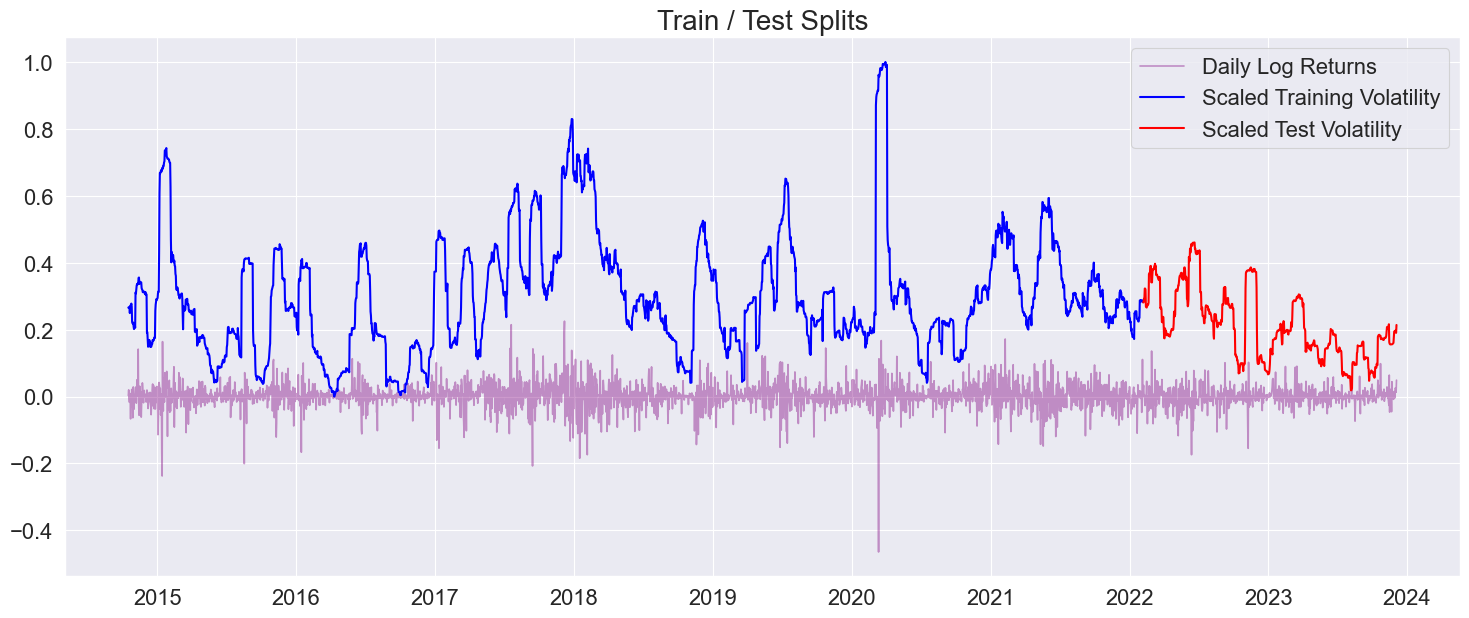

In [ ]:
sns.set_context("paper", font_scale=1.8)
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(18,7))

    plt.plot(df.log_returns, color='purple', label='Daily Log Returns', alpha=0.4)

    plt.plot(y_train_scaled, color='blue', 
             label='Scaled Training Volatility', lw=1.5)
    #plt.plot(y_val_scaled, color='red', 
            # label='Scaled Validation Volatility', lw=1.5)
    plt.plot(y_test_scaled, color='red', 
             label='Scaled Test Volatility', lw=1.5)

    plt.plot()
    plt.title('Train / Test Splits', fontsize=20)
    plt.legend(frameon=True)
    plt.savefig('plots/plot11_train_val_test.png',dpi=300, bbox_inches='tight')
                
    plt.show();

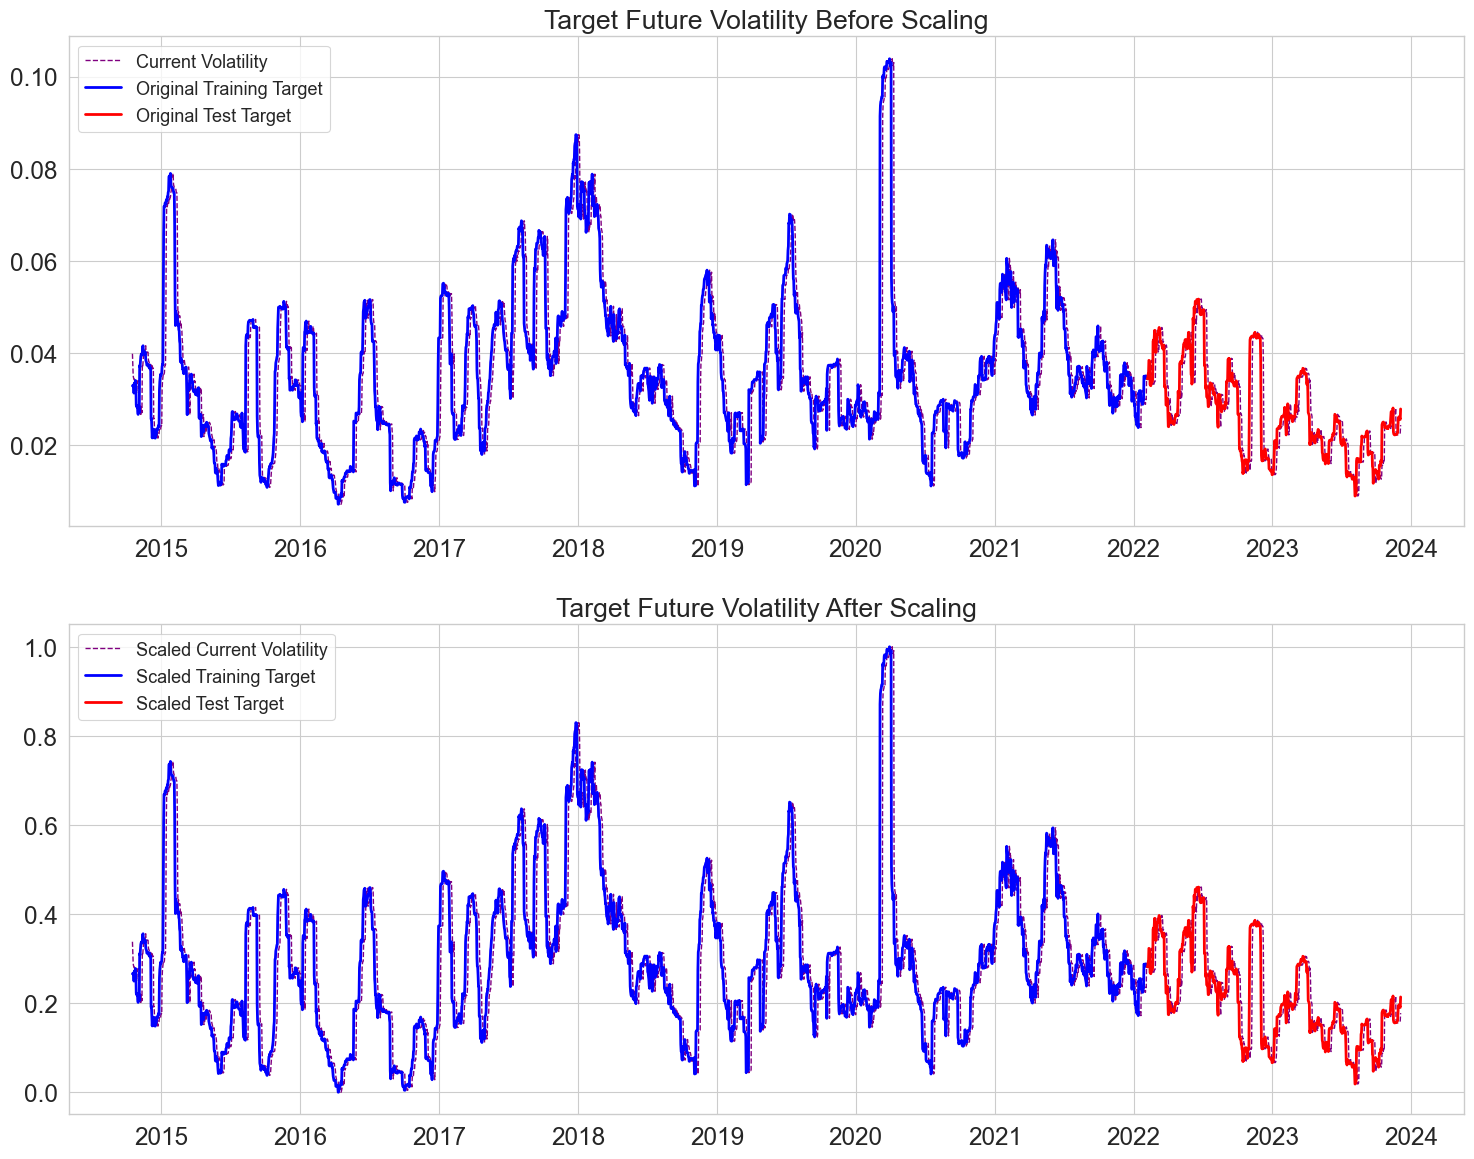

In [ ]:
sns.set_context("paper", font_scale=2)

# VISUALIZE TRAIN/VALIDATION/TEST vol_future BEFORE & AFTER TRAINING
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df.vol_current, lw=1, color='purple', ls='--',
                label='Current Volatility')
    ax1.plot(y_train, color='blue', label='Original Training Target', lw=2)
    #ax1.plot(y_val, color='orange', label='Original Validation Target', lw=2)
    ax1.plot(y_test, color='red', label='Original Test Target', lw=2)

    ax1.title.set_text('Target Future Volatility Before Scaling')

    ax2.plot(transform_volatility_to_scaler(scaler_vol, df.vol_current), 
                lw=1, color='purple', ls='--',
                label='Scaled Current Volatility')
    ax2.plot(y_train_scaled, color='blue', label='Scaled Training Target', lw=2)
    #ax2.plot(y_val_scaled, color='orange', label='Scaled Validation Target', lw=2)
    ax2.plot(y_test_scaled, color='red', label='Scaled Test Target', lw=2)

    ax2.title.set_text('Target Future Volatility After Scaling')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.savefig( 'plots/plot10_train_val_test_org_scled.png',dpi=300, bbox_inches='tight') 
                
    plt.show();

In [ ]:
def mape(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
# DEFINE ROOT MEAN SQUARED PERCENTAGE ERROR FUNCTION
def RMSPE(y_true, y_pred):
    """
    Compute Root Mean Squared Percentage Error between 2 arrays
    """
    output = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return output


In [ ]:
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays
    that can be used as metrics for NN during training
    '''
    loss = K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

    return loss

In [ ]:
# DEFINE ROOT MEAN SQUARED ERROR FUNCTION

def RMSE(y_true, y_pred):
    """
    Compute Root Mean Squared Error between 2 arrays
    """
    output = np.sqrt(mse(y_true, y_pred))
    return output

In [ ]:
# A FUNCTION THAT LOGS MODEL NAME, RMSE AND RMPSE INTO perf_df
# FOR EASY COMPARISON LATER
def log_perf(y_true, y_pred, model_name):
    perf_df.loc[len(perf_df.index)] = [model_name, 
                                       RMSPE(y_true, y_pred), 
                                       RMSE(y_true, y_pred),
                                       mape(y_true,y_pred)]
    return perf_df

In [ ]:
# PLOTTING MODEL PREDICTIONS VS. TARGET VALUES
def viz_model(y_true, y_pred, model_name):
    sns.set_context("paper", font_scale=1.7)
    plt.rcParams["axes.grid"] = False

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(18,7))
        plt.plot(x_test_scaled, color='gray',  ls=':',
                label=f"Scaled Current Daily Volatility")
        
        plt.plot(y_true, color='blue', lw=2, 
                label=f"Target Volatility")
        plt.plot(y_pred, color='orange', lw=2.5,
                label=f'Forecasted Volatility')
        
        # plt.plot(lr_val, color='gray', alpha=0.4,
        #         label='Daily Log Returns')

        plt.title(f'{model_name} \nOn Testset')
        plt.legend(loc='best', frameon=True)

In [ ]:
# CONVERT AN SERIES TO MATRIX DATASET
def windowed_dataset(x_series, y_series, lookback_window):
    dataX, dataY = [], []
    for i in range((lookback_window-1), len(x_series)):
        start_idx = x_series.index[i-lookback_window+1]
        end_idx = x_series.index[i]
        a = x_series[start_idx:end_idx].values
        dataX.append(a)
        dataY.append(y_series[end_idx])

    return np.array(dataX), np.array(dataY)

This is a Python function that converts a pair of input and target pandas Series to a windowed dataset format suitable for use in machine learning models.

The function takes three input parameters: x_series, y_series, and lookback_window. The x_series parameter is a pandas Series of input features, such as the backward-looking realized volatility of the Bitcoin cryptocurrency in this case. The y_series parameter is a pandas Series of target values, such as the forward-looking realized volatility of the Bitcoin cryptocurrency in this case. The lookback_window parameter specifies the number of previous time steps to include in each input window.

The function first initializes two empty lists called dataX and dataY, which will be used to store the input and target data, respectively.

The function then loops over the length of the input Series, starting at the index lookback_window-1, which is the first index that can be used to create a full input window. For each iteration of the loop, the function selects a slice of the input Series that contains the previous lookback_window time steps, starting from the current iteration index and going back lookback_window-1 time steps.

The function then appends the resulting input window to the dataX list, and appends the corresponding target value to the dataY list.

After looping over the entire input Series, the function converts the dataX and dataY lists to numpy arrays using the np.array() function, and returns the resulting arrays as output. The resulting arrays are in a format suitable for use in machine learning models that require input data to be arranged as a 3D tensor with dimensions (samples, time steps, features).

In [ ]:
#for forcast on validation or test set
def forecast(model, range_idx):
    
    start_idx = range_idx[0] - timedelta(n_past - 1)
    end_idx = range_idx[-1]
    mat_X, _ = windowed_dataset(df.vol_current[start_idx:end_idx], 
                                df.vol_future[range_idx], n_past)
    preds = pd.Series(model.predict(mat_X)[:, 0],
                      index=range_idx)

    return preds

This is a Python function that generates point forecasts using a trained machine learning model. The function is designed to work with time series data and uses a sliding window approach to generate the forecasts.

The function takes two input parameters: model and range_idx. The model parameter is a trained machine learning model that has been fit to historical data. The range_idx parameter is a pandas DatetimeIndex object that specifies the range of time steps for which to generate forecasts.

The function first calculates the start and end indices of the input and target data for each forecast step based on the specified n_past parameter (the number of previous time steps to include in each input window).

The function then uses the windowed_dataset() function (which is not shown in this code snippet) to convert the input and target data for the forecast step to a windowed dataset format suitable for use in the machine learning model. The resulting dataset is stored in a numpy array called mat_X.

The function then uses the trained machine learning model to generate point forecasts for the input window using the model.predict() method. The resulting forecasts are stored in a numpy array called preds.

Finally, the function converts the forecasts to a pandas Series called preds with the same index as the input target data, and returns the resulting Series as output.

By using a sliding window approach to generate point forecasts, the function can generate forecasts for a range of future time steps based on historical data and the trained machine learning model.



In [ ]:
def scale(scaler, y_series):
    scaled = pd.Series(scaler.transform(y_series.values.reshape(-1,1))[:, 0],
                       index=y_series.index)
    return scaled

This is a Python function that scales a pandas Series of target values to a normalized scale using a fitted scaler object. The function is designed to work with TensorFlow and Keras models that require target data to be normalized.

The function takes two input parameters: scaler and y_series. The scaler object is a fitted scaler object from the sklearn.preprocessing module, such as a StandardScaler or MinMaxScaler, that has been fit to the training data. The y_series parameter is a pandas Series of target values that need to be transformed to the same scale as the training data.

The function first retrieves the index values of the input Series using the index attribute. It then uses the scaler.transform() method to transform the input Series to the same scale as the training data. The transformed values are stored in a new pandas Series called scaled, with the same index values as the input Series.

The resulting scaled Series contains the transformed values of the original input Series, which can be used as target data for a TensorFlow or Keras model that requires normalized data.

Note that the reshape(-1,1) method is used to ensure that the input data is in the correct format expected by the transform() method (i.e., a 2D array with one column).

In [ ]:
def viz_train_val_metrics(model_hist):
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(15,6))

        # PLOT MSE - LEFT Y-AXIS
        # TRAINING
        ln11 = ax.plot(range(len(model_hist.history['loss'])), 
                    model_hist.history['loss'], color='lightblue',
                    label='Training MSE', lw=2)
        # VALIDATION
        ln12 = ax.plot(range(len(model_hist.history['loss'])),
                    model_hist.history['val_loss'], color='darkblue',
                    label='Validation MSE', lw=2)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('MSE')

        # PLOT RMSE - RIGHT Y-AXIS
        ax2 = ax.twinx()
        ln21 = ax2.plot(range(len(model_hist.history['loss'])), 
                    model_hist.history['rmspe'], color='pink', lw=2,
                    label='Training RMSPE')
        ln22 = ax2.plot(range(len(model_hist.history['loss'])), 
                    model_hist.history['val_rmspe'], color='red', lw=2,
                    label='Validation RMSPE')
        ax2.set_ylabel('RMSPE')

        # COMBINING LALBELS FOR 4 LINES INTO 1 LEGEND
        lns = ln11 + ln12 + ln21 + ln22
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')

        ax.set_title('Training vs. Validation Learning Curves')
        plt.show();

In [ ]:
seed = 69

In [ ]:
df

,Open,High,Low,Close,Volume,returns,log_returns,vol_current,vol_future
Date,,,,,,,,,
2014-10-17 00:00:00+00:00,382.756012,385.477997,375.389008,383.757996,13600700,0.314201,0.003137,0.039872,0.032900
2014-10-18 00:00:00+00:00,383.976013,395.157990,378.971008,391.441986,11416800,2.002301,0.019825,0.037566,0.033009
2014-10-19 00:00:00+00:00,391.253998,393.938995,386.457001,389.545990,5914570,-0.484362,-0.004855,0.035089,0.033083
2014-10-20 00:00:00+00:00,389.230988,390.084015,378.252014,382.845001,16419000,-1.720205,-0.017352,0.034629,0.033017
2014-10-21 00:00:00+00:00,382.420990,392.645996,380.834015,386.475006,14188900,0.948166,0.009437,0.034362,0.031334
...,...,...,...,...,...,...,...,...,...
2023-11-30 00:00:00+00:00,37861.117188,38141.753906,37531.140625,37712.746094,18115982627,-0.384976,-0.003857,0.022330,0.026039
2023-12-01 00:00:00+00:00,37718.007812,38954.109375,37629.359375,38688.750000,23512784002,2.587995,0.025551,0.022461,0.026279
2023-12-02 00:00:00+00:00,38689.277344,39678.937500,38652.593750,39476.332031,15534035612,2.035687,0.020152,0.022618,0.025801


#### 4.6.1. Feature Engineering

The Open/High/Low/Close prices are usually very similar and highly correlated to each other. Therefore, instead of keeping all of them in the dataset, I would add 2 more features:
- **High-Low Spread** - which is the logarithm of the difference between the Highest and Lowest prices intraday as a percentage of the Closing price
- **Open-Close Spread** - which is the difference between the Close and Open prices intraday as a percentage of the Closing price

and then for Volume:
- Volume column has very large values that are billions/millions of times larger than the other features. Therefore I'm going to the get `np.log()` of it, and hopefully transform it into a more normal looking distribution.

and eliminate the three `Close`, `Open`, `High`, `Low` columns.

In [ ]:
df['HL_sprd'] = np.log((df.High - df.Low) / df.Close)
df['CO_sprd'] = (df.Close - df.Open) / df.Open
df['Volume'] = np.log(df.Volume)

This code adds three new features to the DataFrame `df` that are commonly used in financial analysis: the high-low spread, the close-open spread, and the log-transformed volume.

The `np.log((df.High - df.Low) / df.Close)` expression calculates the high-low spread of each row in the DataFrame by taking the difference between the high and low prices, dividing by the closing price, and taking the natural logarithm of the result. This spread measure can be used as an indicator of market volatility.

The `(df.Close - df.Open) / df.Open` expression calculates the close-open spread for each row in the DataFrame by taking the difference between the closing and opening prices, dividing by the opening price. This spread measure can be used as an indicator of market direction.

The `np.log(df.Volume)` expression takes the natural logarithm of the volume of each row in the DataFrame. This transformation can be useful in financial analysis because it scales down the impact of large volume outliers and makes the distribution of volume more symmetric.

After running this code, the DataFrame `df` will have three new columns called 'HL_sprd', 'CO_sprd', and 'Volume', containing the calculated feature values. These features can be used as input to machine learning models to improve their accuracy in predicting Bitcoin price movements.

In [ ]:
features = ['HL_sprd', 'CO_sprd', 'Volume', 'vol_current']

#### 4.6.2. Input Reshaping

The predict here would be to predict next 7 days' volatility (`vol_future`) column using 4 input variables:
1. `HL_sprd`
2. `CO_sprd`
3. `Volume`
4. `vol_current`

Reshaping the inputs is the meat of these Multivariate LSTM. Generally speaking, inputs for LSTM should be in the shape of:


**`[batch_size, n_past, input_dims]`**



in which:

- **`batch_size`** is the number of datapoints in each batch
- **`n_past`** is the number of past time steps to be used for prediction (I'll use the same value as above for now).
- **`input_dims`** is the number of input features (which is 4 in this case)  

In [ ]:
# SEPARATE INPUT DATAFRAME FROM df
input_df = df[features]

# SEPARATE INPUTS FOR TRAINING SET ONLY
X_train = input_df.loc[train_idx]

In [ ]:
X_train.head()

,HL_sprd,CO_sprd,Volume,vol_current
Date,,,,
2014-10-17 00:00:00+00:00,-3.638567,0.002618,16.425632,0.039872
2014-10-18 00:00:00+00:00,-3.185630,0.019444,16.250597,0.037566
2014-10-19 00:00:00+00:00,-3.952483,-0.004365,15.592929,0.035089
2014-10-20 00:00:00+00:00,-3.476822,-0.016407,16.613950,0.034629
2014-10-21 00:00:00+00:00,-3.487953,0.010601,16.467971,0.034362


In [ ]:
def forecast_multi(model, range_idx):
    start_idx = range_idx[0] - timedelta(n_past - 1)
    end_idx = range_idx[-1]
    mat_X, _ = windowed_dataset(input_df[start_idx:end_idx], 
                                df.vol_future[range_idx], n_past)
    preds = pd.Series(model.predict(mat_X)[:, 0],
                      index=range_idx)

    return preds

This is a Python function that generates multi-step price forecasts using a trained machine learning model. The function is designed to work with time series data and uses a sliding window approach to generate the forecasts.

The function takes two input parameters: model and range_idx. The model parameter is a trained machine learning model that has been fit to historical data. The range_idx parameter is a pandas DatetimeIndex object that specifies the range of time steps for which to generate forecasts.

The function first calculates the start and end indices of the input and target data for each forecast step based on the specified n_past parameter (the number of previous time steps to include in each input window).

The function then uses the windowed_dataset() function (which is not shown in this code snippet) to convert the input and target data for the forecast step to a windowed dataset format suitable for use in the machine learning model. The resulting dataset is stored in a numpy array called mat_X.

The function then uses the trained machine learning model to generate predictions for the input window using the model.predict() method. The resulting predictions are stored in a numpy array called preds.

Finally, the function converts the predictions to a pandas Series called preds with the same index as the input target data, and returns the resulting Series as output.

By using a sliding window approach to generate multi-step forecasts, the function can generate forecasts for a range of future time steps based on historical data and the learned patterns in the data captured by the machine learning model.

In [ ]:
#orginal
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

n_past = 30
batch_size = 64
n_dims = input_df.shape[1]

mat_X_tv, mat_y_tv = windowed_dataset(X_train, y_train, n_past)

# CONSTRUCTING MULTIVARIATE BIDIRECTIONAL LSTM NN
lstm_final = tf.keras.models.Sequential([  
    tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]),   
    # BATCH NORMALIZATION  
    tf.keras.layers.BatchNormalization(), 

    # ADDING 1st LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    
    # ADDING 2nd LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.1),

    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

lstm_final.compile(loss='mse', 
                    optimizer="adam", 
                    metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_final.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_final.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 30, 4)             16        
 Normalization)                                                  
                                                                 
 bidirectional (Bidirection  (None, 30, 64)            9472      
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                      

This is Python code that defines and compiles a bidirectional Long Short-Term Memory (LSTM) neural network using the TensorFlow and Keras libraries for multivariate time series forecasting.

The code first clears the Keras backend session using tf.keras.backend.clear_session(). This ensures that the model is built from scratch and any objects from previous sessions are removed.

The code then initializes some variables, including the number of previous time steps to include in each input window (n_past), the batch size for training (batch_size), and the number of input features (n_dims).

The windowed_dataset() function (which is not shown in this code snippet) is called to convert the training data (X_train and y_train) to a windowed dataset format suitable for use in the LSTM model.

The LSTM model is defined using the tf.keras.models.Sequential() function, which creates a sequential stack of layers. The model architecture includes three layers: a batch normalization layer, two bidirectional LSTM layers, and a dense output layer.

The first layer is a batch normalization layer, which normalizes the input data to have zero mean and unit variance. This can improve the convergence and performance of the model.

The next two layers are bidirectional LSTM layers, which are a type of recurrent neural network (RNN) that can capture long-term dependencies in the input data by processing the input sequence in both forward and backward directions. The first LSTM layer returns sequences, while the second LSTM layer returns a single output value for each input sequence.

The final layer is a dense output layer with a single neuron, which produces the predicted output value.

The model is compiled using the compile() method, which specifies the loss function (mse), the optimizer (adam), and a custom metric (rmspe) used for evaluation during training.

The model is also set up to save the best weights during training using the ModelCheckpoint callback, and to stop training early if the validation RMSPE metric does not improve for a certain number of epochs using the EarlyStopping callback.

Finally, the model summary is printed to the console using print(lstm_final.summary()).

In [ ]:
lstm_final_res = lstm_final.fit(mat_X_tv, mat_y_tv, epochs=500,
                                validation_split=0.2,
                                callbacks=[checkpoint_cb,early_stopping_cb],
                                verbose=1, batch_size=batch_size, shuffle=True)


Epoch 1/500


33/33 [==============================] - 9s 74ms/step - loss: 0.0032 - rmspe: 2.3034 - val_loss: 0.0237 - val_rmspe: 4.5142
Epoch 2/500
 4/33 [==>...........................] - ETA: 0s - loss: 0.0012 - rmspe: 1.6091

c:\Users\Kardansoft\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 1s 23ms/step - loss: 9.3779e-04 - rmspe: 1.3669 - val_loss: 0.0245 - val_rmspe: 4.5854
Epoch 3/500
33/33 [==============================] - 1s 25ms/step - loss: 6.6527e-04 - rmspe: 1.0831 - val_loss: 0.0079 - val_rmspe: 2.5926
Epoch 4/500
33/33 [==============================] - 1s 26ms/step - loss: 5.1068e-04 - rmspe: 1.0079 - val_loss: 0.0018 - val_rmspe: 1.2164
Epoch 5/500
33/33 [==============================] - 1s 23ms/step - loss: 4.1264e-04 - rmspe: 0.8396 - val_loss: 0.0025 - val_rmspe: 1.4639
Epoch 6/500
33/33 [==============================] - 1s 26ms/step - loss: 3.8966e-04 - rmspe: 0.8584 - val_loss: 1.6594e-04 - val_rmspe: 0.3890
Epoch 7/500
33/33 [==============================] - 1s 26ms/step - loss: 3.0196e-04 - rmspe: 0.6943 - val_loss: 1.5969e-04 - val_rmspe: 0.3887
Epoch 8/500
33/33 [==============================] - 1s 27ms/step - loss: 2.6420e-04 - rmspe: 0.6693 - val_loss: 8.1928e-05 - val_rmspe: 0.2909
Epoch 9/500
33/33 [=

This Python code trains the bidirectional LSTM neural network defined in the previous code block on the windowed dataset generated using the windowed_dataset() function.

The fit() method is called on the LSTM model object (lstm_final) with the input and target data (mat_X_tv and mat_y_tv, respectively), the number of epochs to train for (epochs=500), the validation split (validation_split=0.2), and several callbacks for monitoring and stopping the training (callbacks=[checkpoint_cb,early_stopping_cb]).

The checkpoint_cb callback is responsible for saving the best weights of the model during training, while the early_stopping_cb callback is responsible for stopping the training if the validation RMSPE metric does not improve for a certain number of epochs.

The verbose parameter is set to 1 to display the training progress during each epoch, and batch_size and shuffle parameters are set to control the number of samples used per gradient update and the order in which samples are presented to the model.

After the training is complete, the fit() method returns a History object that contains information about the training process, including the loss and metric values for each epoch. This object is typically used to visualize the training progress and evaluate the performance of the model on the validation set.


Share
Like
Dislike

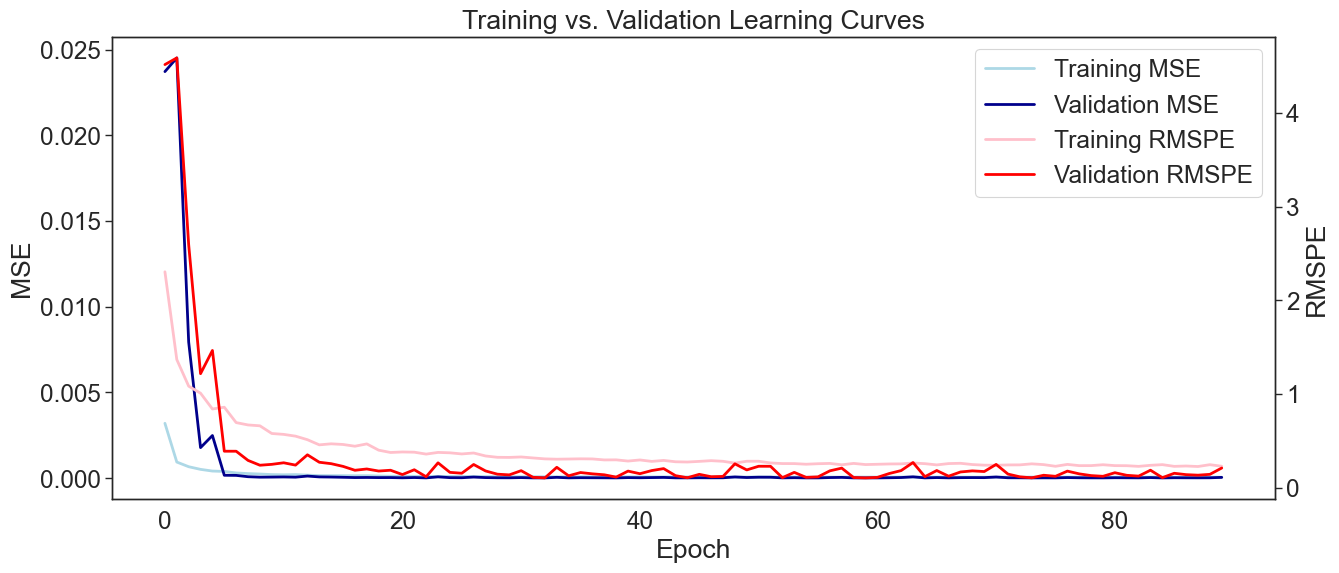

<Figure size 640x480 with 0 Axes>

In [ ]:
viz_train_val_metrics(lstm_final_res)
plt.savefig('plot19_lstm_final_training_validation_curves')

In [ ]:
# FORECASTING ON VALIDATION SET
y_test_preds = forecast_multi(lstm_final, test_idx)

21/21 [==============================] - 2s 7ms/step


In [ ]:
print('RMSPE on Test Set:', RMSPE(y_test, y_test_preds))

RMSPE on Test Set: 0.17070365154450814


In [ ]:
1-RMSPE(y_test, y_test_preds)

0.8292963484554918

In [ ]:
# FORECASTING ON VALIDATION SET
lstm_final_preds = forecast_multi(lstm_final, test_idx)

# SCALING OUTPUT TO MINMAXSCALER FITTED TO TRAINING CURRENT VOLUME
lstm_final_preds_scaled = scale(scaler_vol, lstm_final_preds)

21/21 [==============================] - 0s 7ms/step


This Python code generates multi-step forecasts for the validation set using the trained bidirectional LSTM neural network (lstm_final) and the forecast_multi() function.

The forecast_multi() function takes the trained model and the validation set indices (test_idx) as inputs and returns a pandas Series of forecasted values for each time step in the validation set. These forecasted values are stored in the lstm_final_preds variable.

The code then scales the forecasted values to the same scale as the training data using the scale() function and the scaler_vol object. The resulting scaled forecasted values are stored in the lstm_final_preds_scaled variable.

By scaling the forecasted values to the same scale as the training data, we can compare the forecasted values with the actual values and evaluate the performance of the model on the validation set.

In [ ]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_test_scaled, lstm_final_preds_scaled, 
         f"Multivariate 2 Bidirect LSTM layers (32/16 units), n_past={n_past}, batch={batch_size}, tanh")

,Model,Test RMSPE,Test RMSE,Test Mape
0,Multivariate 2 Bidirect LSTM layers (32/16 uni...,0.351306,0.04648,20.255175


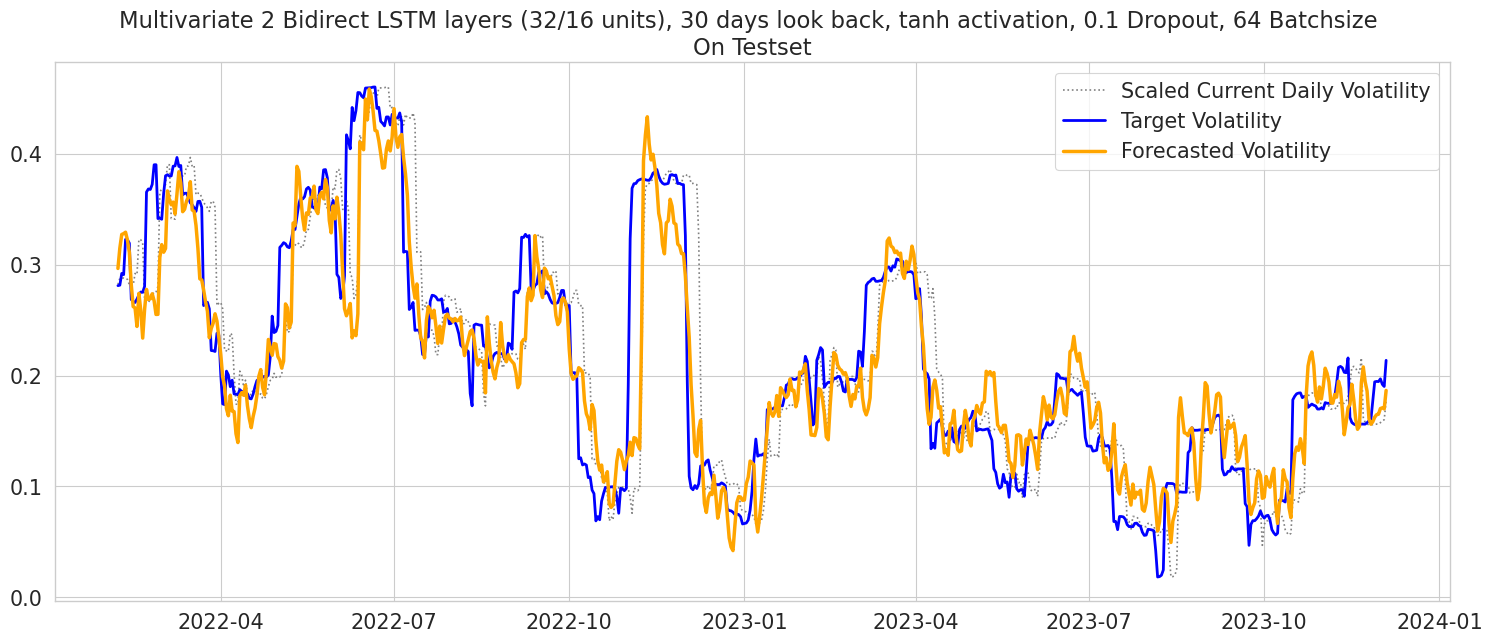

<Figure size 640x480 with 0 Axes>

In [ ]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_test_scaled, lstm_final_preds_scaled, 
          f"Multivariate 2 Bidirect LSTM layers (32/16 units), {n_past} days look back, tanh activation, 0.1 Dropout, 64 Batchsize")

plt.show();
plt.savefig('plots/plot18_lstm8_forecasted_valiation',dpi=300, bbox_inches='tight')

#GARCH MODELS
BootStrap Tarch(1,2,0)




In [ ]:
def scale_tf_cond_vol(model_result):
    '''
    Scale & Transform Conditional Volatility 
    Estimated by GARCH Models
    '''
    # OBTAIN ESTIMATED CONDITIONAL VOLATILITY FROM MODEL RESULT
    cond_vol = model_result.conditional_volatility

    # INITIATE SCALER
    scaler = MinMaxScaler()

    # FIT SCALER TO MODEL'S ESTIMATED CONDITIONAL VOLATILITY
    scaler = scaler.fit(cond_vol.values.reshape(-1,1))

    scaled_cond_vol = transform_volatility_to_scaler(scaler, cond_vol)
    return scaler, scaled_cond_vol

This is a Python function that scales and transforms estimated conditional volatility obtained from GARCH models using a scaler object. The function takes a model_result object as input, which is typically the output of a GARCH model estimation.

The function first extracts the estimated conditional volatility from the model_result object using the conditional_volatility attribute.

The function then initializes a MinMaxScaler object from the sklearn.preprocessing module, which will be used to scale and transform the estimated conditional volatility.

The fit() method of the scaler object is called to fit the scaler to the estimated conditional volatility. The reshape() method is used to ensure that the input data is in the correct format expected by the fit() method (i.e., a 2D array with one column).

The transform_volatility_to_scaler() function (which is not shown in this code snippet) is called to scale and transform the estimated conditional volatility using the fitted scaler object. The resulting scaled and transformed conditional volatility is stored in a new pandas Series called scaled_cond_vol.

The function returns both the scaler object and the scaled_cond_vol Series as output. These objects can be used to scale and transform future estimated conditional volatility values using the same scaling applied to the training data, which can improve the accuracy of price forecasts based on these models.

In [ ]:
# VISUALIZE MODEL'S ESTIMATED CONDITIONAL VOLATILITY 
# WITH SCALED vol_current CALCULATED ABOVE
def viz_cond_vol(cond_vol_series, model_name):
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(18,7))

        ax.plot(x_train_scaled, color='blue', lw=2,
                label=f'Scaled {INTERVAL_WINDOW}-Day Interval Daily Realized Volatility')
        ax.plot(cond_vol_series, color='orange', lw=2,
                label=f'Scaled {model_name} Estimated Conditional Volatility')
        ax.set_title('Training Set')
        plt.legend()
        plt.show();

In [ ]:
# SPLIT RETURNS INTO 3 PARTS
# (this would be the input for GARCH models)
r_train = df.returns[train_idx]
r_test = df.returns[test_idx]

This Python code splits the log returns of the Bitcoin price (df.returns) into three parts for use as input to GARCH models. The three parts are typically the training set, the validation set, and the test set.

The code first selects the log returns corresponding to the training set indices (train_idx) and assigns them to the variable r_train.

The code then selects the log returns corresponding to the test set indices (test_idx) and assigns them to the variable r_test.

These log returns can then be used as input to GARCH models to estimate the conditional volatility of the Bitcoin price, which can be used to generate forecasts and assess the risk of future price movements.

In [ ]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

t_120 = arch_model(r_train, p=1, q=2, o=0, power=1.0,
                  dist='skewt')
result_4 = t_120.fit(disp='off')
print(result_4.summary())

                          Constant Mean - AVGARCH Model Results                          
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                               AVGARCH   Log-Likelihood:               -6815.12
Distribution:      Standardized Skew Student's t   AIC:                           13644.2
Method:                       Maximum Likelihood   BIC:                           13685.5
                                                   No. Observations:                 2669
Date:                           Wed, Dec 13 2023   Df Residuals:                     2668
Time:                                   14:34:53   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

This Python code initializes and fits a GARCH model with skewed t-distributed residuals to the log returns of the Bitcoin price (r_train).

The arch_model() function from the arch library is used to initialize the GARCH model object (t_120). The function specifies the order of the GARCH model (p=1 and q=2) as well as the distribution of the residuals (dist='skewt').

The power parameter controls the power transformation applied to the data. A value of 1.0 indicates no transformation is applied.

The fit() method is called on the GARCH model object with the disp parameter set to 'off' to disable display of convergence information during the optimization process.

After the model is fit, the summary() method is called on the resulting result_4 object, which prints a summary of the model estimation results to the console. This summary includes information about the estimated parameters, the log-likelihood, and various goodness-of-fit statistics. The summary can be used to evaluate the fit of the model to the training data and assess the appropriateness of the model for generating forecasts and assessing risk.




In [ ]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_tarch_120, scaled_tarch_120_cond_vol = scale_tf_cond_vol(result_4)

This Python code scales and transforms the estimated conditional volatility obtained from the GARCH model fitted in the previous code block (result_4) using the scale_tf_cond_vol() function.

The scale_tf_cond_vol() function takes the result_4 object as input and returns a scaler object and a scaled_cond_vol Series, which represent the scaling and transformed estimated conditional volatility, respectively.

The scaler_tarch_120 variable is assigned the scaler object returned by the scale_tf_cond_vol() function, which can be used to scale and transform future estimated conditional volatility values using the same scaling applied to the training data.

The scaled_tarch_120_cond_vol variable is assigned the scaled_cond_vol Series returned by the scale_tf_cond_vol() function, which represents the scaled and transformed estimated conditional volatility estimated by the GARCH model. This Series can be used to generate forecasts and assess the risk of future price movements based on the GARCH model.


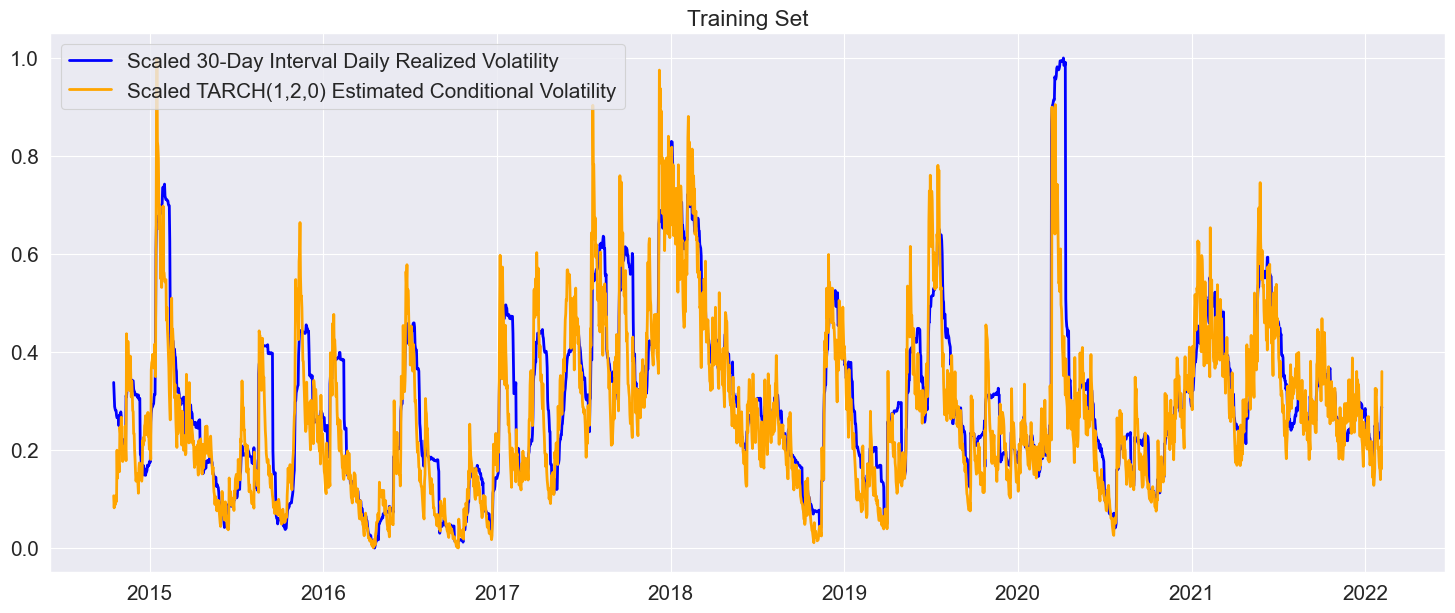

<Figure size 640x480 with 0 Axes>

In [ ]:
viz_cond_vol(scaled_tarch_120_cond_vol, f'TARCH(1,2,0)')
plt.savefig('plots/plot14_TARCH(1,2)estimate_trainingData')

In [ ]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(test_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = test_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, q=2, o=0, power=1.0,
                       dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING BOOTSTRAP METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                             method='bootstrap').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_bs_120_preds = pd.DataFrame(rolling_forecasts, index=test_idx)

c:\Users\Kardansoft\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\Kardansoft\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\Kardansoft\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\Kardansoft\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimize

This Python code generates rolling window forecasts for the Bitcoin price volatility using a GARCH model with skewed t-distributed residuals.

The code first initializes an empty list called `rolling_forecasts` that will be used to store the volatility forecasts at each time step.

The code then iterates over each time step in the validation set (`test_idx`) and trains a new GARCH model on all previous log returns data up to the current time step. The `arch_model()` function is used to initialize the GARCH model object with the same specifications as in the previous code block.

The `fit()` method is called on the GARCH model object with the `disp` parameter set to `'off'` to disable display of convergence information during the optimization process.

The `forecast()` method is then called on the resulting `model_fit` object to generate volatility forecasts for the next `n_future` days using the bootstrap method. The resulting volatility forecast is stored in the `pred` variable.

The code appends the forecasted volatility value (`pred`) to the `rolling_forecasts` list for the current time step.

After all time steps have been processed, the `rolling_forecasts` list is converted to a pandas DataFrame called `t_bs_120_preds` with the same index as the validation set (`test_idx`).

This rolling window approach allows us to generate volatility forecasts at each time step based on all previous data up to that time step, which can improve the accuracy of the forecasts and provide a more realistic estimate of the risk associated with future price movements.

In [ ]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_120_preds_scaled = transform_volatility_to_scaler(scaler_tarch_120, t_bs_120_preds)

This Python code transforms the volatility forecasts generated using the rolling window GARCH model (t_bs_120_preds) to the same scale as the training data using the scaler_tarch_120 object returned by the scale_tf_cond_vol() function.

The transform_volatility_to_scaler() function (which is not shown in this code snippet) takes the scaler_tarch_120 object and the volatility forecasts (t_bs_120_preds) as input, and returns a pandas Series of scaled and transformed volatility forecasts.

The resulting scaled and transformed volatility forecasts are stored in the t_120_preds_scaled variable. These scaled forecasts can be compared with the actual volatility values to evaluate the performance of the rolling window GARCH model in generating volatility forecasts, and to assess the risk associated with future price movements.

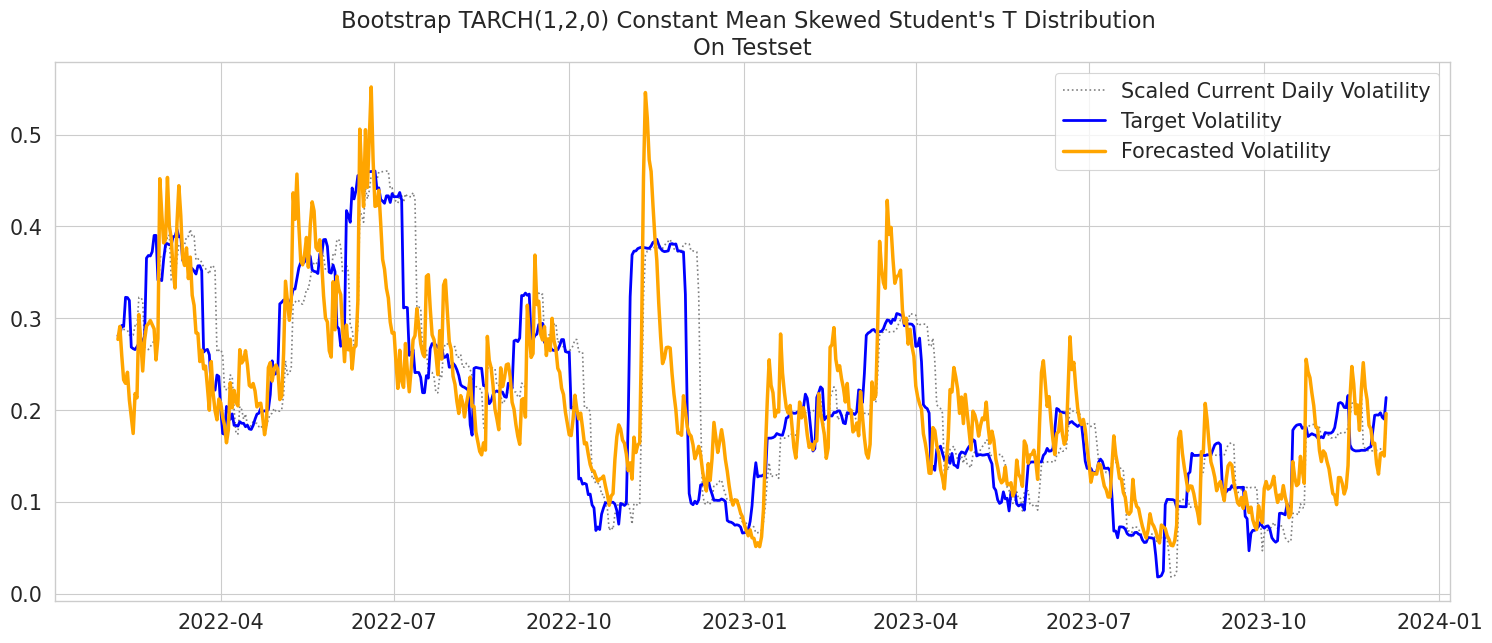

In [ ]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_test_scaled, t_120_preds_scaled, 
          "Bootstrap TARCH(1,2,0) Constant Mean Skewed Student's T Distribution")
plt.savefig('plots/plot15_bootstrap_TARCH(1,2,0)forecasting_validationData(best_tarch).png')
            
plt.show();

In [ ]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_test_scaled, t_120_preds_scaled, 
         f"Bootstrap TARCH(1,2,0), Constant Mean, Skewt Dist")

,Model,Test RMSPE,Test RMSE,Test Mape
0,Multivariate 2 Bidirect LSTM layers (32/16 uni...,0.351306,0.046480,20.255175
1,Multivariate 2 Bidirect LSTM layers (32/16 uni...,0.371813,0.045859,20.731855
2,"Bootstrap TARCH(1,2,0), Constant Mean, Skewt Dist",0.372053,0.062160,26.312609


GJR Garch

In [ ]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

gjr_gm = arch_model(r_train, p=1, q=1, o=1, 
                    vol='GARCH', dist='skewt')
result_2 = gjr_gm.fit(disp='off')
print(result_2.summary())

                         Constant Mean - GJR-GARCH Model Results                         
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -6816.56
Distribution:      Standardized Skew Student's t   AIC:                           13647.1
Method:                       Maximum Likelihood   BIC:                           13688.4
                                                   No. Observations:                 2669
Date:                           Wed, Dec 13 2023   Df Residuals:                     2668
Time:                                   14:37:13   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

This Python code initializes and fits a GJR-GARCH model with skewed t-distributed residuals to the log returns of the Bitcoin price (`r_train`).

The `arch_model()` function from the `arch` library is used to initialize the GJR-GARCH model object (`gjr_gm`). The function specifies the order of the GARCH model (`p=1` and `q=1`) and the order of the GJR-GARCH model (`o=1`), as well as the distribution of the residuals (`dist='skewt'`).

The `vol` parameter specifies the type of volatility process to use. In this case, the GARCH volatility process is used.

The `fit()` method is called on the GJR-GARCH model object with the `disp` parameter set to `'off'` to disable display of convergence information during the optimization process.

After the model is fit, the `summary()` method is called on the resulting `result_2` object, which prints a summary of the model estimation results to the console. This summary includes information about the estimated parameters, the log-likelihood, and various goodness-of-fit statistics. The summary can be used to evaluate the fit of the model to the training data and assess the appropriateness of the model for generating forecasts and assessing risk.

In [ ]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_gjr, scaled_gjr_cond_vol = scale_tf_cond_vol(result_2)

This Python code scales and transforms the estimated conditional volatility obtained from the GJR-GARCH model fitted in the previous code block (result_2) using the scale_tf_cond_vol() function.

The scale_tf_cond_vol() function takes the result_2 object as input and returns a scaler object and a scaled_cond_vol Series, which represent the scaling and transformed estimated conditional volatility, respectively.

The scaler_gjr variable is assigned the scaler object returned by the scale_tf_cond_vol() function, which can be used to scale and transform future estimated conditional volatility values using the same scaling applied to the training data.

The scaled_gjr_cond_vol variable is assigned the scaled_cond_vol Series returned by the scale_tf_cond_vol() function, which represents the scaled and transformed estimated conditional volatility estimated by the GJR-GARCH model. This Series can be used to generate forecasts and assess the risk of future price movements based on the GJR-GARCH model.

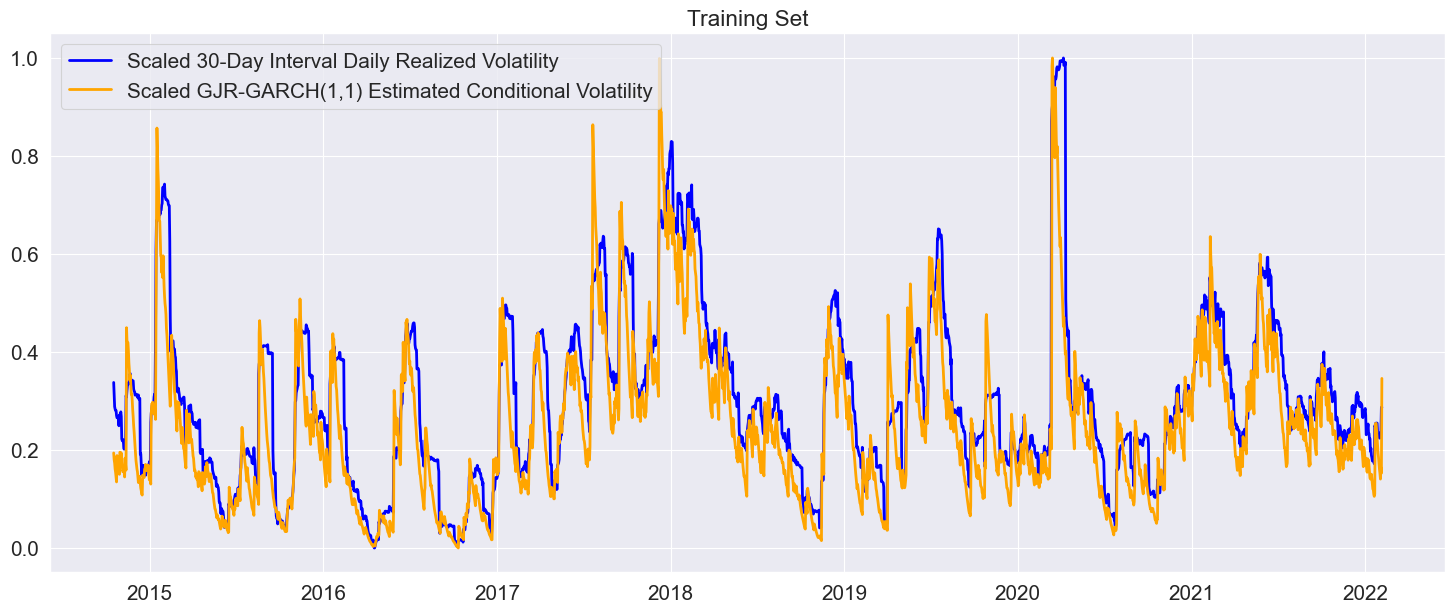

<Figure size 640x480 with 0 Axes>

In [ ]:
viz_cond_vol(scaled_gjr_cond_vol, 'GJR-GARCH(1,1)')
plt.savefig('plots/plot8_GJR-GARCH(1,1)estimate_trainingData')

In [ ]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(test_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = test_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, q=1, o=1, 
                       vol='GARCH', dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gjr_1_preds = pd.DataFrame(rolling_forecasts, index=test_idx)

This Python code generates rolling window forecasts for the Bitcoin price volatility using a GJR-GARCH model with skewed t-distributed residuals.

The code first initializes an empty list called rolling_forecasts that will be used to store the volatility forecasts at each time step.

The code then iterates over each time step in the validation set (test_idx) and trains a new GJR-GARCH model on all previous log returns data up to the current time step. The arch_model() function is used to initialize the GJR-GARCH model object with the same specifications as in the previous code block.

The fit() method is called on the GJR-GARCH model object with the disp parameter set to 'off' to disable display of convergence information during the optimization process.

The forecast() method is then called on the resulting model_fit object to generate volatility forecasts for the next n_future days. The resulting volatility forecast is stored in the pred variable.

The code appends the forecasted volatility value (pred) to the rolling_forecasts list for the current time step.

After all time steps have been processed, the rolling_forecasts list is converted to a pandas DataFrame called gjr_1_preds with the same index as the validation set (test_idx).

This rolling window approach allows us to generate volatility forecasts at each time step based on all previous data up to that time step, which can improve the accuracy of the forecasts and provide a more realistic estimate of the risk associated with future price movements.

In [ ]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
gjr_1_preds_scaled = transform_volatility_to_scaler(scaler_gjr, gjr_1_preds)

This Python code transforms the volatility forecasts generated using the rolling window GJR-GARCH model (`gjr_1_preds`) to the same scale as the training data using the `scaler_gjr` object returned by the `scale_tf_cond_vol()` function.

The `transform_volatility_to_scaler()` function (which is not shown in this code snippet) takes the `scaler_gjr` object and the volatility forecasts (`gjr_1_preds`) as input, and returns a pandas Series of scaled and transformed volatility forecasts.

The resulting scaled and transformed volatility forecasts are stored in the `gjr_1_preds_scaled` variable. These scaled forecasts can be compared with the actual volatility values to evaluate the performance of the rolling window GJR-GARCH model in generating volatility forecasts, and to assess the risk associated with future price movements.

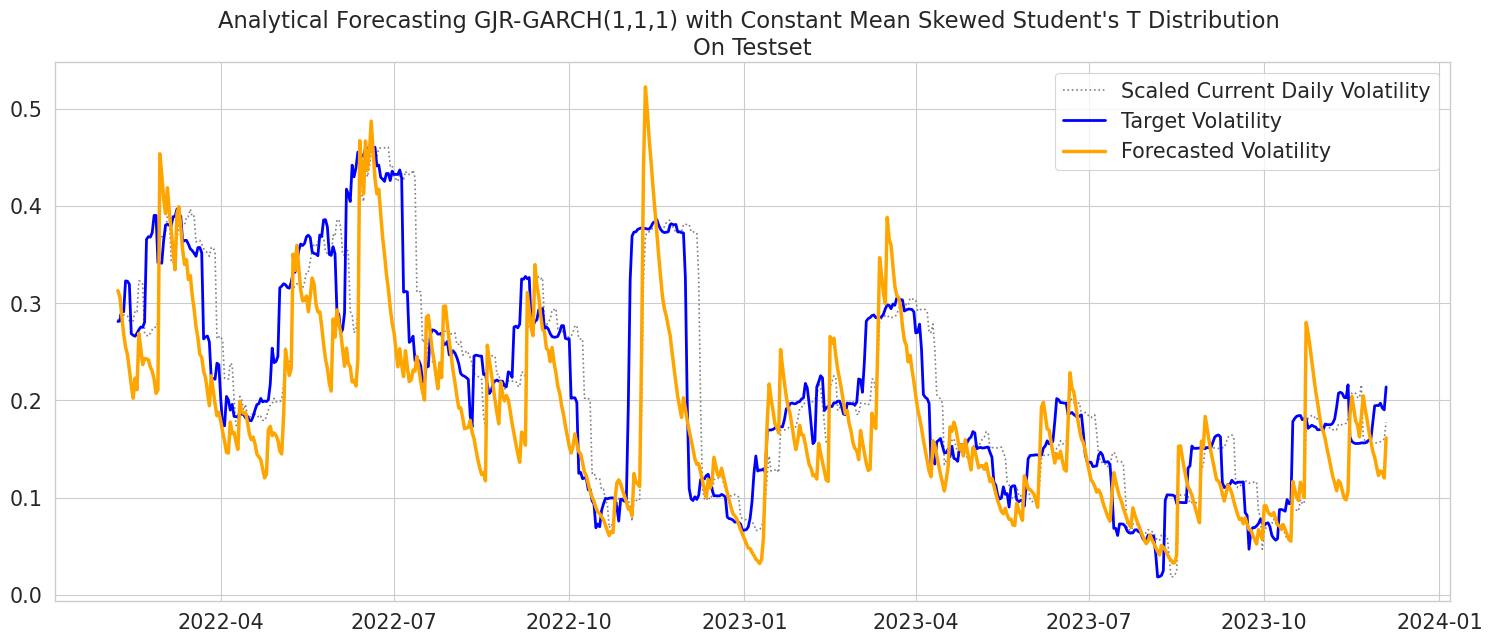

In [ ]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_test_scaled, gjr_1_preds_scaled, 
          "Analytical Forecasting GJR-GARCH(1,1,1) with Constant Mean Skewed Student's T Distribution")
plt.savefig('plots/plot9_GJR-GARCH(1,1,1)forecasting_validationData')

In [ ]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_test_scaled, gjr_1_preds_scaled, 
         "Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist")

,Model,Test RMSPE,Test RMSE,Test Mape
0,Multivariate 2 Bidirect LSTM layers (32/16 uni...,0.351306,0.046480,20.255175
1,Multivariate 2 Bidirect LSTM layers (32/16 uni...,0.371813,0.045859,20.731855
2,"Bootstrap TARCH(1,2,0), Constant Mean, Skewt Dist",0.372053,0.062160,26.312609
3,"Analytical GJR-GARCH(1,1,1), Constant Mean, Sk...",0.296675,0.067330,23.109112


In [ ]:
# SET SEED FOR REPRODUCIBILITY

np.random.seed(seed)

gm_1 = arch_model(r_train, p=7, q=7)
result_1 = gm_1.fit(disp='off')
print()
print(result_1.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7164.30
Distribution:                  Normal   AIC:                           14360.6
Method:            Maximum Likelihood   BIC:                           14454.8
                                        No. Observations:                 2669
Date:                Wed, Dec 13 2023   Df Residuals:                     2668
Time:                        14:39:39   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2180  7.205e-02      3.025  2.485e-03 [7.675e-

This Python code initializes and fits an ARCH model to the log returns of the Bitcoin price (`r_train`).

The `arch_model()` function from the `arch` library is used to initialize the ARCH model object (`gm_1`). The function specifies the order of the ARCH model (`p=7`) and the order of the GARCH model (`q=7`).

The `fit()` method is called on the ARCH model object with the `disp` parameter set to `'off'` to disable display of convergence information during the optimization process.

After the model is fit, the `summary()` method is called on the resulting `result_1` object, which prints a summary of the model estimation results to the console. This summary includes information about the estimated parameters, the log-likelihood, and various goodness-of-fit statistics. The summary can be used to evaluate the fit of the model to the training data and assess the appropriateness of the model for generating forecasts and assessing risk.

In [ ]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_garch, scaled_cond_vol = scale_tf_cond_vol(result_1)

This Python code scales and transforms the estimated conditional volatility obtained from the ARCH model fitted in the previous code block (result_1) using the scale_tf_cond_vol() function.

The scale_tf_cond_vol() function takes the result_1 object as input and returns a scaler object and a scaled_cond_vol Series, which represent the scaling and transformed estimated conditional volatility, respectively.

The scaler_garch variable is assigned the scaler object returned by the scale_tf_cond_vol() function, which can be used to scale and transform future estimated conditional volatility values using the same scaling applied to the training data.

The scaled_cond_vol variable is assigned the scaled_cond_vol Series returned by the scale_tf_cond_vol() function, which represents the scaled and transformed estimated conditional volatility estimated by the ARCH model. This Series can be used to generate forecasts and assess the risk of future price movements based on the ARCH model.

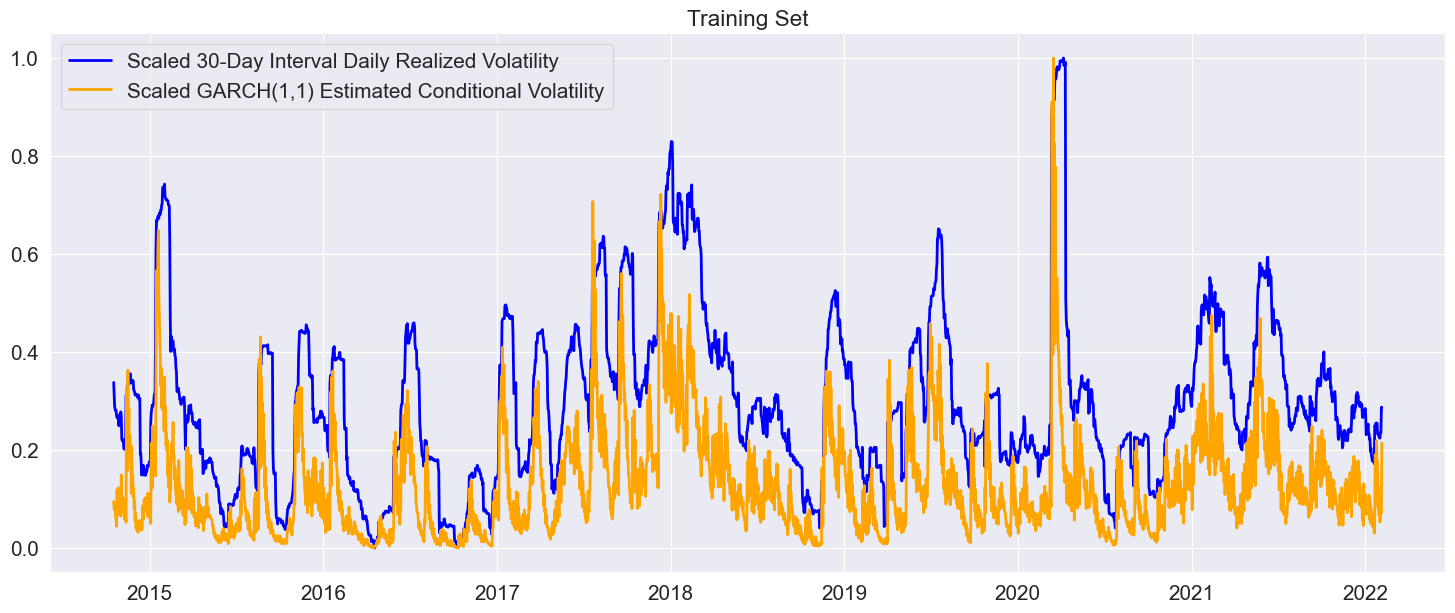

<Figure size 640x480 with 0 Axes>

In [ ]:
viz_cond_vol(scaled_cond_vol, 'GARCH(1,1)')
plt.savefig('plots/plot5_GARCH_estimated_trainingset')

In [ ]:
# ONE STEP EXPANDING WINDOW FORECAST
# INITIALIZING rolling_forecast
rolling_forecasts = []
idx = df.index

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(test_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = test_idx[i]
    train = df.returns[:idx]
    
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, vol='GARCH', p=1, q=1,
                       dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    # GET THE SQRT OF AVERAGE n_future DAYS VARIANCE
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gm_1_preds = pd.Series(rolling_forecasts, index=test_idx)

This Python code generates expanding window forecasts for the Bitcoin price volatility using an ARCH model.

The code first initializes an empty list called rolling_forecasts that will be used to store the volatility forecasts at each time step.

The code then iterates over each time step in the validation set (test_idx) and trains a new ARCH model on all available log returns data up to the current time step. The arch_model() function is used to initialize the ARCH model object with the same specifications as in the previous code block.

The fit() method is called on the ARCH model object with the disp parameter set to 'off' to disable display of convergence information during the optimization process.

The forecast() method is then called on the resulting model_fit object to generate volatility forecasts for the next n_future days. The resulting volatility forecast is stored in the pred variable.

The code appends the forecasted volatility value (pred) to the rolling_forecasts list for the current time step.

After all time steps have been processed, the rolling_forecasts list is converted to a pandas Series called gm_1_preds with the same index as the validation set (test_idx).

This expanding window approach allows us to generate volatility forecasts at each time step based on all available data up to that time step, which can provide a broader perspective on the evolution of volatility over time and the risk associated with future price movements.

In [ ]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
gm_1_preds_scaled = transform_volatility_to_scaler(scaler_garch, gm_1_preds)

This Python code transforms the volatility forecasts generated using the expanding window ARCH model (gm_1_preds) to the same scale as the training data using the scaler_garch object returned by the scale_tf_cond_vol() function.

The transform_volatility_to_scaler() function (which is not shown in this code snippet) takes the scaler_garch object and the volatility forecasts (gm_1_preds) as input, and returns a pandas Series of scaled and transformed volatility forecasts.

The resulting scaled and transformed volatility forecasts are stored in the gm_1_preds_scaled variable. These scaled forecasts can be compared with the actual volatility values to evaluate the performance of the expanding window ARCH model in generating volatility forecasts, and to assess the risk associated with future price movements.

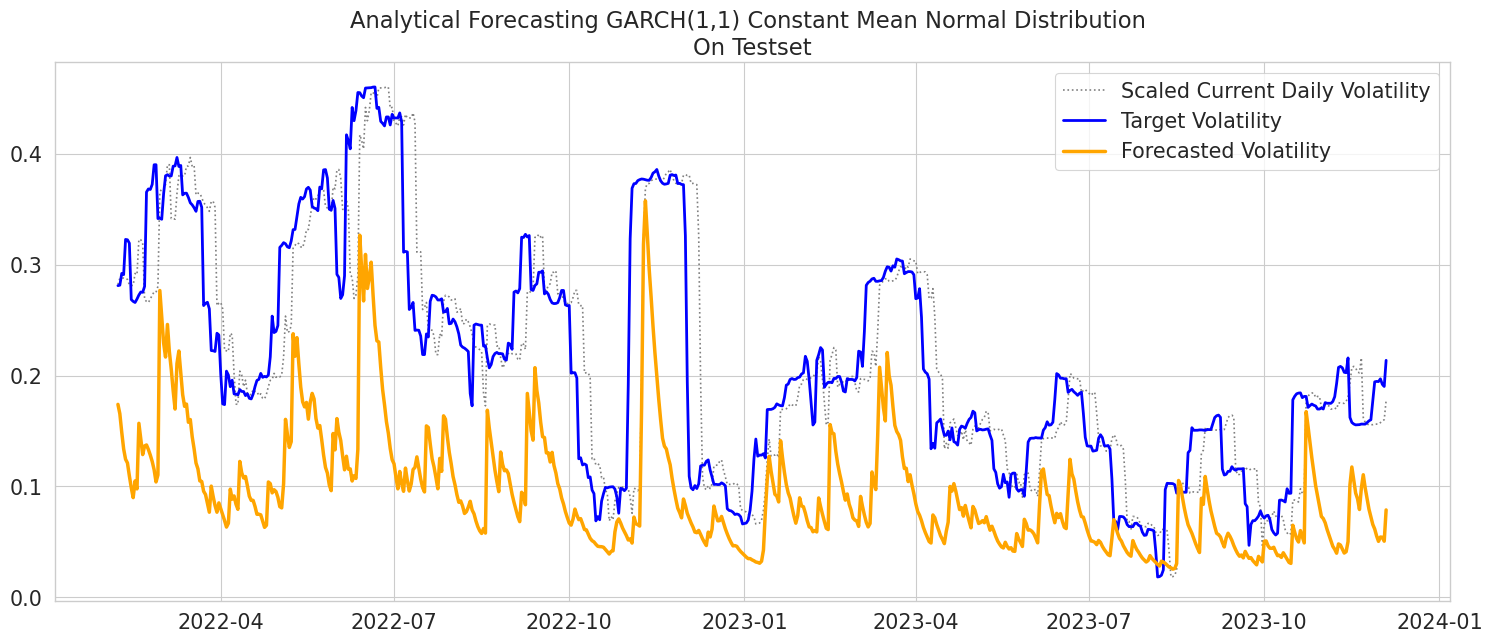

In [ ]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_test_scaled, gm_1_preds_scaled, 
          'Analytical Forecasting GARCH(1,1) Constant Mean Normal Distribution')
plt.savefig('plots/plot6_GARCH(1,1)_forecasting_validationData')

In [ ]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_test_scaled, gm_1_preds_scaled, 
         'GARCH(1,1), Constant Mean, Normal Dist')

,Model,Test RMSPE,Test RMSE,Test Mape
0,Multivariate 2 Bidirect LSTM layers (32/16 uni...,0.351306,0.046480,20.255175
1,Multivariate 2 Bidirect LSTM layers (32/16 uni...,0.371813,0.045859,20.731855
2,"Bootstrap TARCH(1,2,0), Constant Mean, Skewt Dist",0.372053,0.062160,26.312609
3,"Analytical GJR-GARCH(1,1,1), Constant Mean, Sk...",0.296675,0.067330,23.109112
4,"GARCH(1,1), Constant Mean, Normal Dist",0.556840,0.137964,53.473555
